probabilidad de salto: 0.2
procesando entradas_cantidad_nodos_50/entrada00010...

procesando entradas_cantidad_nodos_50/entrada00020...

procesando entradas_cantidad_nodos_50/entrada00030...

procesando entradas_cantidad_nodos_50/entrada00040...

procesando entradas_cantidad_nodos_50/entrada00050...

procesando entradas_cantidad_nodos_50/entrada00060...

procesando entradas_cantidad_nodos_50/entrada00070...

procesando entradas_cantidad_nodos_50/entrada00080...

procesando entradas_cantidad_nodos_50/entrada00090...

probabilidad de salto: 0.2
procesando entradas_cantidad_nodos_150/entrada00010...

procesando entradas_cantidad_nodos_150/entrada00020...

procesando entradas_cantidad_nodos_150/entrada00030...

procesando entradas_cantidad_nodos_150/entrada00040...

procesando entradas_cantidad_nodos_150/entrada00050...

procesando entradas_cantidad_nodos_150/entrada00060...

procesando entradas_cantidad_nodos_150/entrada00070...

procesando entradas_cantidad_nodos_150/entrada00080...

pro

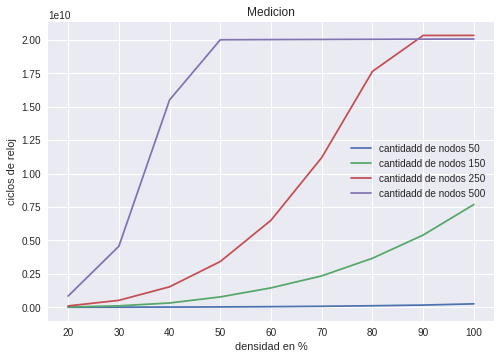

probabilidad de salto: 0.8
procesando entradas_densidad_20/entrada00010...

procesando entradas_densidad_20/entrada00020...

procesando entradas_densidad_20/entrada00030...

procesando entradas_densidad_20/entrada00040...

procesando entradas_densidad_20/entrada00050...

procesando entradas_densidad_20/entrada00060...

procesando entradas_densidad_20/entrada00070...

procesando entradas_densidad_20/entrada00080...

procesando entradas_densidad_20/entrada00090...

procesando entradas_densidad_20/entrada00100...

procesando entradas_densidad_20/entrada00110...

procesando entradas_densidad_20/entrada00120...

procesando entradas_densidad_20/entrada00130...

procesando entradas_densidad_20/entrada00140...

procesando entradas_densidad_20/entrada00150...

procesando entradas_densidad_20/entrada00160...

procesando entradas_densidad_20/entrada00170...

procesando entradas_densidad_20/entrada00180...

procesando entradas_densidad_20/entrada00190...

procesando entradas_densidad_20/entrada002

procesando entradas_densidad_100/entrada00190...

procesando entradas_densidad_100/entrada00200...

procesando entradas_densidad_100/entrada00210...

procesando entradas_densidad_100/entrada00220...

procesando entradas_densidad_100/entrada00230...

procesando entradas_densidad_100/entrada00240...

procesando entradas_densidad_100/entrada00250...

procesando entradas_densidad_100/entrada00260...

procesando entradas_densidad_100/entrada00270...

procesando entradas_densidad_100/entrada00280...

procesando entradas_densidad_100/entrada00290...

procesando entradas_densidad_100/entrada00300...

procesando entradas_densidad_100/entrada00310...

procesando entradas_densidad_100/entrada00320...

procesando entradas_densidad_100/entrada00330...

procesando entradas_densidad_100/entrada00340...

procesando entradas_densidad_100/entrada00350...

procesando entradas_densidad_100/entrada00360...

procesando entradas_densidad_100/entrada00370...

procesando entradas_densidad_100/entrada00380...



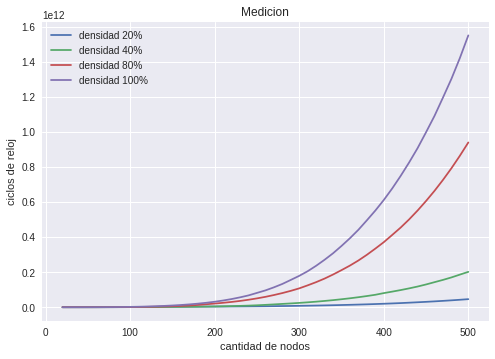

probabilidad de salto: 0.8
procesando entradas_cantidad_nodos_50/entrada00010...

procesando entradas_cantidad_nodos_50/entrada00020...

procesando entradas_cantidad_nodos_50/entrada00030...

procesando entradas_cantidad_nodos_50/entrada00040...

procesando entradas_cantidad_nodos_50/entrada00050...

procesando entradas_cantidad_nodos_50/entrada00060...

procesando entradas_cantidad_nodos_50/entrada00070...

procesando entradas_cantidad_nodos_50/entrada00080...

procesando entradas_cantidad_nodos_50/entrada00090...

probabilidad de salto: 0.8
procesando entradas_cantidad_nodos_150/entrada00010...

procesando entradas_cantidad_nodos_150/entrada00020...

procesando entradas_cantidad_nodos_150/entrada00030...

procesando entradas_cantidad_nodos_150/entrada00040...

procesando entradas_cantidad_nodos_150/entrada00050...

procesando entradas_cantidad_nodos_150/entrada00060...

procesando entradas_cantidad_nodos_150/entrada00070...

procesando entradas_cantidad_nodos_150/entrada00080...

pro

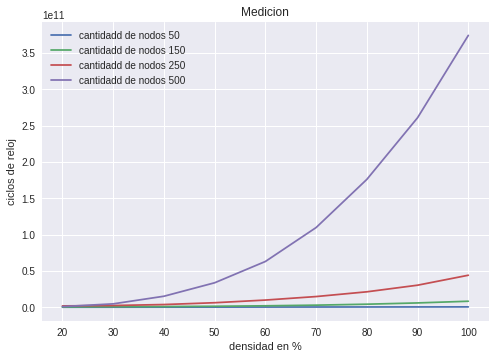

In [374]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from random import randrange
from decimal import Decimal
from __future__ import division
##------------Configuracion------------------------------------------------------##
path_dir_de_trabajo = ''
path_entradas = path_dir_de_trabajo + 'entradas/'
path_salidas = path_dir_de_trabajo + 'salidas/'
nombre_page_rank = 'tp1'
probabilidad_de_salto = '0.2'
##------------Configuracion------------------------------------------------------##

##-------------Generador de grafos con cierta densidad---------------------------##
def getArcoAleatorio(grafo):
    i = random.randint(1, len(grafo))
    j = random.randint(1, len(grafo))
    
    while (grafo[i-1][j-1]>0):
        i = random.randint(1, len(grafo))
        j = random.randint(1, len(grafo))
        #print(grafo[i-1][j-1]==1.0)
    return [i-1, j-1]

   
def generar_grafo_con_cantidad_de_nodos(densidad, cantidad_de_nodos):
    grafo = np.zeros((cantidad_de_nodos, cantidad_de_nodos))  # Matriz de ceros
    cantidad_maxima_de_arcos = cantidad_de_nodos * (cantidad_de_nodos - 1)
    
    cantidad_de_arcos = 0
    promedio_de_arcos = 0
    
    while (promedio_de_arcos < densidad):
        arco = getArcoAleatorio(grafo)
        grafo[arco[0]][arco[1]] = 1
        cantidad_de_arcos = cantidad_de_arcos + 1
        promedio_de_arcos = (cantidad_de_arcos / cantidad_maxima_de_arcos)*100
        #print(promedio_de_arcos)
    return grafo    
    
def generar_grafo_con_densidad(cantidad_de_nodos, densidad):
    grafo = np.zeros((cantidad_de_nodos, cantidad_de_nodos))  # Matriz de ceros
    cantidad_maxima_de_arcos = cantidad_de_nodos ** 2
    
    cantidad_de_arcos = 0
    promedio_de_arcos = 0
    
    while (promedio_de_arcos < densidad):
        arco = getArcoAleatorio(grafo)
        grafo[arco[0]][arco[1]] = 1
        cantidad_de_arcos = cantidad_de_arcos + 1
        promedio_de_arcos = (cantidad_de_arcos / cantidad_maxima_de_arcos)*100
        #print(promedio_de_arcos)
    return grafo
##-------------Generador de grafos con cierta densidad---------------------------##


##------------Generamos archivos de entrada--------------------------------------##



# devuelve si hay link entre dos nodos con la probabilidad de entrada
def hay_link(probabilidad_de_link):
    p = np.zeros_like([0,1], dtype=float)
    p[0] = 1 - probabilidad_de_link
    p[1] = probabilidad_de_link
    return np.random.choice([0,1], 1, p=p)[0]

# genera un grafo aleatorio de la cantidad de nodos indicada como parametro
# y la probabilidad de agregar links entre dos páginas dadas = p
def generar_grafo_aleatorio(cantidad_nodos, probabilidad_de_link):
    grafo = np.zeros((cantidad_nodos, cantidad_nodos))  # Matriz de ceros\n"
    
    for i in range(0, cantidad_nodos-1):
        for j in range(0, cantidad_nodos-1):
            if (i==j):
                grafo[i][j] = 0
            else:
                grafo[i][j] = hay_link(probabilidad_de_link)
    return grafo

# genera los archivos de entrada con matrices de 2 páginas hasta 'cantidad_maxima_de_paginas', 
# la probabilidad que haya un link entre dos nodos es 'probabilidad_de_link'
# 'nombre_archivo_entrada' es el path y el prefijo con el que va a generar los nombres de los 
# archivos de entrada, a esos prefijos les va a concatenar la cantidad de páginas que tiene
# el grafo de páginas. Agregue el parametro paso que indica la cantidad de nodos en que crece el grafo.
def generar_entradas(path, generador_de_grafos, parametro_fijo, parametro_variable, paso):       
    for i in range(paso, parametro_variable, paso):
        grafo = generador_de_grafos(parametro_fijo, i)
        f =open(path + "entrada" + str(i).zfill(5), 'w')
        salida = generar_salida_matriz(grafo);
        f.write(salida.encode('utf8'))
        f.close()

# transforma la matriz al formato de entrada pedido por la catedra
def generar_salida_matriz(matriz):
    ret = ''
    cant_paginas = matriz.shape[0]
    total_links = 0
    for i in range(0, cant_paginas):
        for j in range(0, cant_paginas):
            if (matriz[i][j]!=0):
                total_links += 1;
                ret = ret + str(i) + ' ' + str(j) + '\n'
    ret = str(cant_paginas) + '\n' + str(total_links) + '\n' + ret
    return ret

#escribe la salida cumpliendo el formato pedido por la catedra
def escribir_salidas(nombre_archivo_entrada, nombre_archivo_salida):
    f =open(nombre_archivo_entrada + str(i) + '.out', 'r')
    




##------------Generamos archivos de entrada--------------------------------------##

##---------Tomamos mediciones utilizando la entrada generada previamente y las guardamos---------##

def tomarMediciones(path, generador_de_grafos, parametro_fijo, parametro_variable, paso, probabilidad_de_salto):    
    print('probabilidad de salto: ' + str(probabilidad_de_salto))
    cantidad_mediciones = 20
    os.popen('mkdir ' + path_dir_de_trabajo + path)
    os.popen('mkdir ' + path_dir_de_trabajo + path + "mediciones/")
    os.popen('rm ' + path_dir_de_trabajo + path + '*')
    generar_entradas(path_dir_de_trabajo + path, generador_de_grafos, parametro_fijo, parametro_variable, paso)    
    o=os.popen('ls ' + path_dir_de_trabajo + path).read()
    
    nombres = o.splitlines()
    f = open(path_dir_de_trabajo + path + "mediciones/mediciones.csv", 'w')
    f.write('cantidad de nodos, ciclos de reloj \n')
    a = [len(nombres)]
    i = 1
    medicion = 0
    for nombre in nombres:
        if (nombre != 'mediciones'):
            print('procesando ' + path + nombre + '...\n')
            i = i + 1
            for j in range(1, cantidad_mediciones):
                medicion = medicion + Decimal(os.popen(path_dir_de_trabajo + nombre_page_rank + ' ' +  path_dir_de_trabajo + path + nombre + ' ' + str(probabilidad_de_salto)).read())
            f.write(str(i*paso) + ',' + str(medicion / cantidad_mediciones) + '\n')
    f.close()

    df = pd.read_csv(path_dir_de_trabajo + path + "mediciones/mediciones.csv")

    df.head()
    
    
##---------Tomamos mediciones utilizando la entrada generada previamente---------##

##---------Generamos el grafico a partir de las mediciones-----------------------##
def reject_outliers(datos1, datos2):
    m = 2
    u = np.mean(datos2)
    s = np.std(datos2)
    i = 0
    indices = []
    filtrados = []
    for e in datos2: 
        i = i+1
        if (u - 2 * s < e < u + 2 * s):
            indices.append(datos1[i])
            filtrados.append(e)
    return [indices, filtrados]

def juntarMediciones(mediciones):
    meds = []
    i = 1
    for medicion in mediciones: 
        df = pd.read_csv(path_dir_de_trabajo + medicion[0] + "mediciones/mediciones.csv")
        df.columns = [df.columns[0], medicion[1]]
        meds.append(df[df.columns[1]])
    return meds
    
def graficar(mediciones, titulo, labelx, labely, tipo_de_grafico):
    #plt.gcf().clear()
    fig1 = plt.gcf() 
    df = pd.read_csv(path_dir_de_trabajo + mediciones[0][0] + "mediciones/mediciones.csv")
    
    med = juntarMediciones(mediciones)

    plt.title(titulo)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    
    for medicion in med: 
        y = medicion
        plt.plot(df[df.columns[0]], y)

    ax = plt.subplot(111)
    ax.legend()
    plt.grid(True)
    plt.show()
    plt.draw()
    fig1.savefig(path_dir_de_trabajo + "mediciones.png", dpi=100)
##---------Generamos el grafico a partir de las mediciones-----------------------##

##--------------Procedimiento general para cualquier grafo-----------------------##

densidades = [20, 40, 80, 100]
#variamos la densidad
def experimento_variando_la_densidad(densidades, cantidad_maxima_de_nodos, paso, p):
    mediciones = []
    for densidad in densidades:
        tomarMediciones('entradas_densidad_' + str(densidad) + '/', generar_grafo_con_cantidad_de_nodos, densidad, cantidad_maxima_de_nodos, paso, p)    
        mediciones.append(['entradas_densidad_' + str(densidad) + '/', 'densidad ' + str(densidad) + '%']) 

    graficar(mediciones, 'Medicion', 'cantidad de nodos', 'ciclos de reloj', 'line')

cantidad_de_nodos = [50, 150, 250, 500]
def experimento_variando_la_cantidad_de_nodos(cantidad_de_nodos, densidad, paso, p):
    mediciones = []
    for cantidad_nodos in cantidad_de_nodos:
        tomarMediciones('entradas_cantidad_nodos_' + str(cantidad_nodos) + '/', generar_grafo_con_densidad, cantidad_nodos, densidad, paso, p)
        mediciones.append(['entradas_cantidad_nodos_' + str(cantidad_nodos) + '/', 'cantidadd de nodos ' + str(cantidad_nodos)])

    graficar(mediciones, 'Medicion', 'densidad en %', 'ciclos de reloj', 'line')
    
    
experimento_variando_la_densidad(densidades, 500, 10, 0.2)
experimento_variando_la_cantidad_de_nodos(cantidad_de_nodos, 100, 10, 0.2)
experimento_variando_la_densidad(densidades, 500, 10, 0.8)
experimento_variando_la_cantidad_de_nodos(cantidad_de_nodos, 100, 10, 0.8)


# la toma de mediciones y los graficos se hacen a la vez en "experimento_variando_..."
# pero una vez generadas las mediciones se puede llamar direcatamente a "graficar" 
# pasandole un arreglo que contenga el path a las medicciones realizadas como este:
#
#    mediciones = [['entradas_cantidad_nodos_50/', 'cantidadd de nodos 50'], 
#                  ['entradas_cantidad_nodos_150/', 'cantidad de nodos 150'],
#                  ['entradas_cantidad_nodos_250/', 'cantidad de nodos 250'],
#                  ['entradas_cantidad_nodos_500/', 'cantidad de nodos 500']]

